In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# reading csv file 
data = pd.read_csv('books.csv')
# show first 5 rows 
data.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,6,11870085,11870085,16827462,226,525478817,9.780525e+12,John Green,2012.0,The Fault in Our Stars,...,2346404,2478609,140739,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...
4,12,13335037,13335037,13155899,210,62024035,9.780062e+12,Veronica Roth,2011.0,Divergent,...,1903563,2216814,101023,36315,82870,310297,673028,1114304,https://images.gr-assets.com/books/1328559506m...,https://images.gr-assets.com/books/1328559506s...


In [6]:
# to see all the column's name
data.columns.tolist()

['book_id',
 'goodreads_book_id',
 'best_book_id',
 'work_id',
 'books_count',
 'isbn',
 'isbn13',
 'authors',
 'original_publication_year',
 'original_title',
 'title',
 'language_code',
 'average_rating',
 'ratings_count',
 'work_ratings_count',
 'work_text_reviews_count',
 'ratings_1',
 'ratings_2',
 'ratings_3',
 'ratings_4',
 'ratings_5',
 'image_url',
 'small_image_url']

In [7]:
# to see the shape of the image
data.shape

(1354, 23)

In [8]:
'''
we will remove the columns that will not affect our analysis like image url , small image url , best book id
goodreads book id , work id ,isbn ,rating count , title 

''' 
data = data.loc[:,[
                 'book_id' ,
                 'books_count',
                 'isbn13',
                 'authors',
                 'original_publication_year',
                 'language_code',
                 'average_rating',
                 'title',
                 'ratings_count',
                 'work_ratings_count',
                 'work_text_reviews_count',
                 'ratings_1',
                 'ratings_2',
                 'ratings_3',
                 'ratings_4',
                 'ratings_5',
                 'original_title']]
data.head()

,book_id,books_count,isbn13,authors,original_publication_year,language_code,average_rating,title,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,original_title
0,1,272,9.780439e+12,Suzanne Collins,2008.0,eng,4.34,"The Hunger Games (The Hunger Games, #1)",4780653,4942365,155254,66715,127936,560092,1481305,2706317,The Hunger Games
1,2,491,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,eng,4.44,Harry Potter and the Sorcerer's Stone (Harry P...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,Harry Potter and the Philosopher's Stone
2,3,226,9.780316e+12,Stephenie Meyer,2005.0,en-US,3.57,"Twilight (Twilight, #1)",3866839,3916824,95009,456191,436802,793319,875073,1355439,Twilight
3,6,226,9.780525e+12,John Green,2012.0,eng,4.26,The Fault in Our Stars,2346404,2478609,140739,47994,92723,327550,698471,1311871,The Fault in Our Stars
4,12,210,9.780062e+12,Veronica Roth,2011.0,eng,4.24,"Divergent (Divergent, #1)",1903563,2216814,101023,36315,82870,310297,673028,1114304,Divergent


In [9]:
# making the original title as our dependent column
col = data.pop('original_title')
data = pd.concat([data, col], axis=1)

In [10]:
data

,book_id,books_count,isbn13,authors,original_publication_year,language_code,average_rating,title,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,original_title
0,1,272,9.780439e+12,Suzanne Collins,2008.0,eng,4.34,"The Hunger Games (The Hunger Games, #1)",4780653,4942365,155254,66715,127936,560092,1481305,2706317,The Hunger Games
1,2,491,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,eng,4.44,Harry Potter and the Sorcerer's Stone (Harry P...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,Harry Potter and the Philosopher's Stone
2,3,226,9.780316e+12,Stephenie Meyer,2005.0,en-US,3.57,"Twilight (Twilight, #1)",3866839,3916824,95009,456191,436802,793319,875073,1355439,Twilight
3,6,226,9.780525e+12,John Green,2012.0,eng,4.26,The Fault in Our Stars,2346404,2478609,140739,47994,92723,327550,698471,1311871,The Fault in Our Stars
4,12,210,9.780062e+12,Veronica Roth,2011.0,eng,4.24,"Divergent (Divergent, #1)",1903563,2216814,101023,36315,82870,310297,673028,1114304,Divergent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,9925,52,9.781582e+12,Mary Hoffman,2002.0,eng,3.90,"City of Masks (Stravaganza, #1)",12048,13385,555,314,758,3154,4872,4287,City of Masks
1350,9937,22,9.781596e+12,Caragh M. O'Brien,2012.0,en-US,3.77,"Promised (Birthmarked, #3)",11766,12884,1260,256,1098,3565,4392,3573,Promised
1351,9942,18,9.781442e+12,"Abigail Haas, Abby McDonald",2013.0,eng,4.14,Dangerous Girls,10439,12970,2631,203,553,2029,4567,5618,Dangerous Girls
1352,9947,19,9.780062e+12,Maria Dahvana Headley,2015.0,eng,3.60,"Magonia (Magonia, #1)",12510,13652,2910,577,1440,3881,4772,2982,Magonia


In [11]:
# to see the shape of the data after removing unnecessary
data.shape

(1354, 17)

In [12]:
# how many null values we have in each column
data.isna().sum()

book_id                        0
books_count                    0
isbn13                        44
authors                        0
original_publication_year      3
language_code                109
average_rating                 0
title                          0
ratings_count                  0
work_ratings_count             0
work_text_reviews_count        0
ratings_1                      0
ratings_2                      0
ratings_3                      0
ratings_4                      0
ratings_5                      0
original_title                52
dtype: int64

In [13]:
# we can drop the rows of orginal publication year and isbn13 because it have few null values
data = data.dropna(subset = ['original_publication_year'])
data = data.dropna(subset = ['isbn13'])
data = data.dropna(subset = ['original_title'])

In [24]:
# we will replace the value of language code by most frequent use 
data['language_code'] = data['language_code'].mode()[0]

In [25]:
# see the data after removing all the null values
data.isna().sum()

book_id                      0
books_count                  0
isbn13                       0
authors                      0
original_publication_year    0
language_code                0
average_rating               0
title                        0
ratings_count                0
work_ratings_count           0
work_text_reviews_count      0
ratings_1                    0
ratings_2                    0
ratings_3                    0
ratings_4                    0
ratings_5                    0
original_title               0
dtype: int64

In [16]:
# to check for duplicates
data.duplicated().sum()

0

In [17]:
# to check the type of data columns
data.dtypes

book_id                        int64
books_count                    int64
isbn13                       float64
authors                       object
original_publication_year    float64
language_code                 object
average_rating               float64
title                         object
ratings_count                  int64
work_ratings_count             int64
work_text_reviews_count        int64
ratings_1                      int64
ratings_2                      int64
ratings_3                      int64
ratings_4                      int64
ratings_5                      int64
original_title                object
dtype: object

In [18]:
# to see information about columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1261 entries, 0 to 1353
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    1261 non-null   int64  
 1   books_count                1261 non-null   int64  
 2   isbn13                     1261 non-null   float64
 3   authors                    1261 non-null   object 
 4   original_publication_year  1261 non-null   float64
 5   language_code              1261 non-null   object 
 6   average_rating             1261 non-null   float64
 7   title                      1261 non-null   object 
 8   ratings_count              1261 non-null   int64  
 9   work_ratings_count         1261 non-null   int64  
 10  work_text_reviews_count    1261 non-null   int64  
 11  ratings_1                  1261 non-null   int64  
 12  ratings_2                  1261 non-null   int64  
 13  ratings_3                  1261 non-null   int64  
 1

In [ ]:
# to check about correlation between columns
sns.heatmap(data.corr(numeric_only = True).round(1), annot=True, vmax= 1 , vmin=-1 , center = 0 )

<Axes: >

In [28]:
# to select the highest correlation 
highest = data.corr(numeric_only = True)
highest = highest.unstack()
highest = highest[abs(highest) >= 0.97]
highest = highest[abs(highest)<1]
print(highest)

ratings_count       work_ratings_count    0.998814
                    ratings_4             0.986152
                    ratings_5             0.974711
work_ratings_count  ratings_count         0.998814
                    ratings_4             0.989610
                    ratings_5             0.976314
ratings_4           ratings_count         0.986152
                    work_ratings_count    0.989610
ratings_5           ratings_count         0.974711
                    work_ratings_count    0.976314
dtype: float64


In [29]:
# we will drop the highest corrlated columns
data.drop(['work_ratings_count'] , axis = 1 ,inplace = True)
data.drop(['ratings_count'] , axis = 1 ,inplace = True)


In [30]:
# to see the result after dropping highest correlated columns
highest = data.corr(numeric_only = True)
highest = highest.unstack()
highest = highest[abs(highest) >= 0.97]
highest = highest[abs(highest)<1]
print(highest)

Series([], dtype: float64)


In [31]:
# to get the author name for harry potter series
author = [i for i in data.authors.unique() if i.find('J.K. Rowling') != -1]
# to get the books that have been written by the author
author_books = data.loc[data.authors.isin(author)]
# get harry poter books that have been written by the author
harry_potter = [i for i in author_books.title.unique() if i.find('Harry Potter and ') != -1]
# to get the rows that have harry potter books
harry_potter_books = author_books.loc[author_books.title.isin(harry_potter)]
harry_potter_books

,book_id,books_count,isbn13,authors,original_publication_year,language_code,average_rating,title,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,original_title
1,2,491,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,eng,4.44,Harry Potter and the Sorcerer's Stone (Harry P...,75867,75504,101676,455024,1156318,3011543,Harry Potter and the Philosopher's Stone
6,18,376,9.780440e+12,"J.K. Rowling, Mary GrandPré, Rufus Beck",1999.0,eng,4.53,Harry Potter and the Prisoner of Azkaban (Harr...,36099,6716,20413,166129,509447,1266670,Harry Potter and the Prisoner of Azkaban
8,21,307,9.780439e+12,"J.K. Rowling, Mary GrandPré",2003.0,eng,4.46,Harry Potter and the Order of the Phoenix (Har...,28685,9528,31577,180210,494427,1124806,Harry Potter and the Order of the Phoenix
9,23,398,9.780439e+12,"J.K. Rowling, Mary GrandPré",1998.0,eng,4.37,Harry Potter and the Chamber of Secrets (Harry...,34172,8253,42251,242345,548266,1065084,Harry Potter and the Chamber of Secrets
10,24,332,9.780439e+12,"J.K. Rowling, Mary GrandPré",2000.0,eng,4.53,Harry Potter and the Goblet of Fire (Harry Pot...,31084,6676,20210,151785,494926,1195045,Harry Potter and the Goblet of Fire
11,25,263,9.780545e+12,"J.K. Rowling, Mary GrandPré",2007.0,eng,4.61,Harry Potter and the Deathly Hallows (Harry Po...,51942,9363,22245,113646,383914,1318227,Harry Potter and the Deathly Hallows
12,27,275,9.780440e+12,"J.K. Rowling, Mary GrandPré",2005.0,eng,4.54,Harry Potter and the Half-Blood Prince (Harry ...,27520,7308,21516,136333,459028,1161491,Harry Potter and the Half-Blood Prince


In [32]:
# to know the shape of the data 
harry_potter_books.shape

(7, 15)

In [33]:
# to check if the name is duplicated or not
harry_potter_books['original_title'].duplicated().sum()

0

In [34]:
# to show the most selling harry potter books in descending order 
grouped = harry_potter_books['books_count'].groupby(harry_potter_books['original_title']).sum().reset_index()
grouped.sort_values(['books_count'],ascending = False)

,original_title,books_count
5,Harry Potter and the Philosopher's Stone,491
0,Harry Potter and the Chamber of Secrets,398
6,Harry Potter and the Prisoner of Azkaban,376
2,Harry Potter and the Goblet of Fire,332
4,Harry Potter and the Order of the Phoenix,307
3,Harry Potter and the Half-Blood Prince,275
1,Harry Potter and the Deathly Hallows,263


In [35]:
#the most selling book within the Harry Potter series. 
harry_potter_books['original_title'].loc[harry_potter_books['books_count'].idxmax()]

"Harry Potter and the Philosopher's Stone"

In [36]:
#calculate the average rating of all Harry Potter books. 
harry_potter_books.loc[:, 'average_rating'].mean()

4.497142857142857

<BarContainer object of 7 artists>

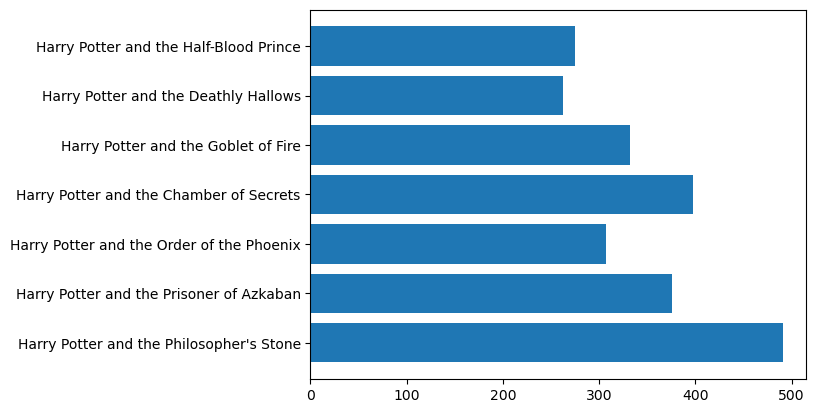

In [37]:
# barplot to see different number of editions in different type of harry potter books
plt.barh(harry_potter_books['original_title'],harry_potter_books['books_count'])